In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

# Importación de las clases creadas en nuestro archivo de soporte
# -----------------------------------------------------------------------
import sys
sys.path.append("../")
from src import soporte_outliers as so


In [2]:
df = pd.read_csv("../data/api_rent_madrid_extract_sin_nulos_enconding.csv", index_col = 0, sep=";").reset_index(drop=True)
df.head(1)

price  propertyType   operation  size    exterior  rooms  bathrooms  \
0  750.0    697.559567  692.932011  60.0  694.964912      1          1   

   municipality      status  newDevelopment       floor    district  \
0    705.594114  695.243827      694.904908  697.689843  701.253737   

   neighborhood     hasLift  hasParkingSpace    typology  subTypology  \
0    700.317911  702.252872       691.040741  695.226866   696.600707   

   priceByArea  
0         13.0

In [3]:
df.columns

Index(['price', 'propertyType', 'operation', 'size', 'exterior', 'rooms',
       'bathrooms', 'municipality', 'status', 'newDevelopment', 'floor',
       'district', 'neighborhood', 'hasLift', 'hasParkingSpace', 'typology',
       'subTypology', 'priceByArea'],
      dtype='object')

In [4]:
df_out = df[['propertyType', 'operation', 'size', 'exterior', 'rooms',
       'bathrooms', 'municipality', 'status', 'newDevelopment', 'floor',
       'district', 'neighborhood', 'hasLift', 'hasParkingSpace', 'typology',
       'subTypology', 'priceByArea']]

In [5]:
df_out.head()

propertyType   operation  size    exterior  rooms  bathrooms  municipality  \
0    697.559567  692.932011  60.0  694.964912      1          1    705.594114   
1    697.559567  692.932011  70.0  694.964912      2          1    701.418584   
2    673.290678  692.932011  67.0  694.964912      2          2    654.819074   
3    697.559567  692.932011  70.0  694.964912      3          2    679.539684   
4    689.814572  692.932011  45.0  694.964912      0          1    705.594114   

       status  newDevelopment       floor    district  neighborhood  \
0  695.243827      694.904908  697.689843  701.253737    700.317911   
1  695.243827      694.904908  678.664014  700.208637    679.793298   
2  695.243827      694.904908  696.092223  645.657771    679.793298   
3  695.243827      694.904908  670.416613  645.657771    679.793298   
4  682.123310      682.123310  670.416613  645.657771    679.793298   

      hasLift  hasParkingSpace    typology  subTypology  priceByArea  
0  702.252872       691.040741  695.226866   696.600707    13.000000  
1  687.633544       691.040741  695.226866   696.600707    11.000000  
2  687.633544       691.040741  695.226866   673.290678     6.000000  
3  687.633544       691.040741  695.226866   696.600707     8.000000  
4  673.705516       691.040741  682.123310   696.600707    13.294985

In [6]:
# instanciamos la clase que nos permite identificar y gestionar outliers
gestion = so.GestionOutliersUnivariados(df)

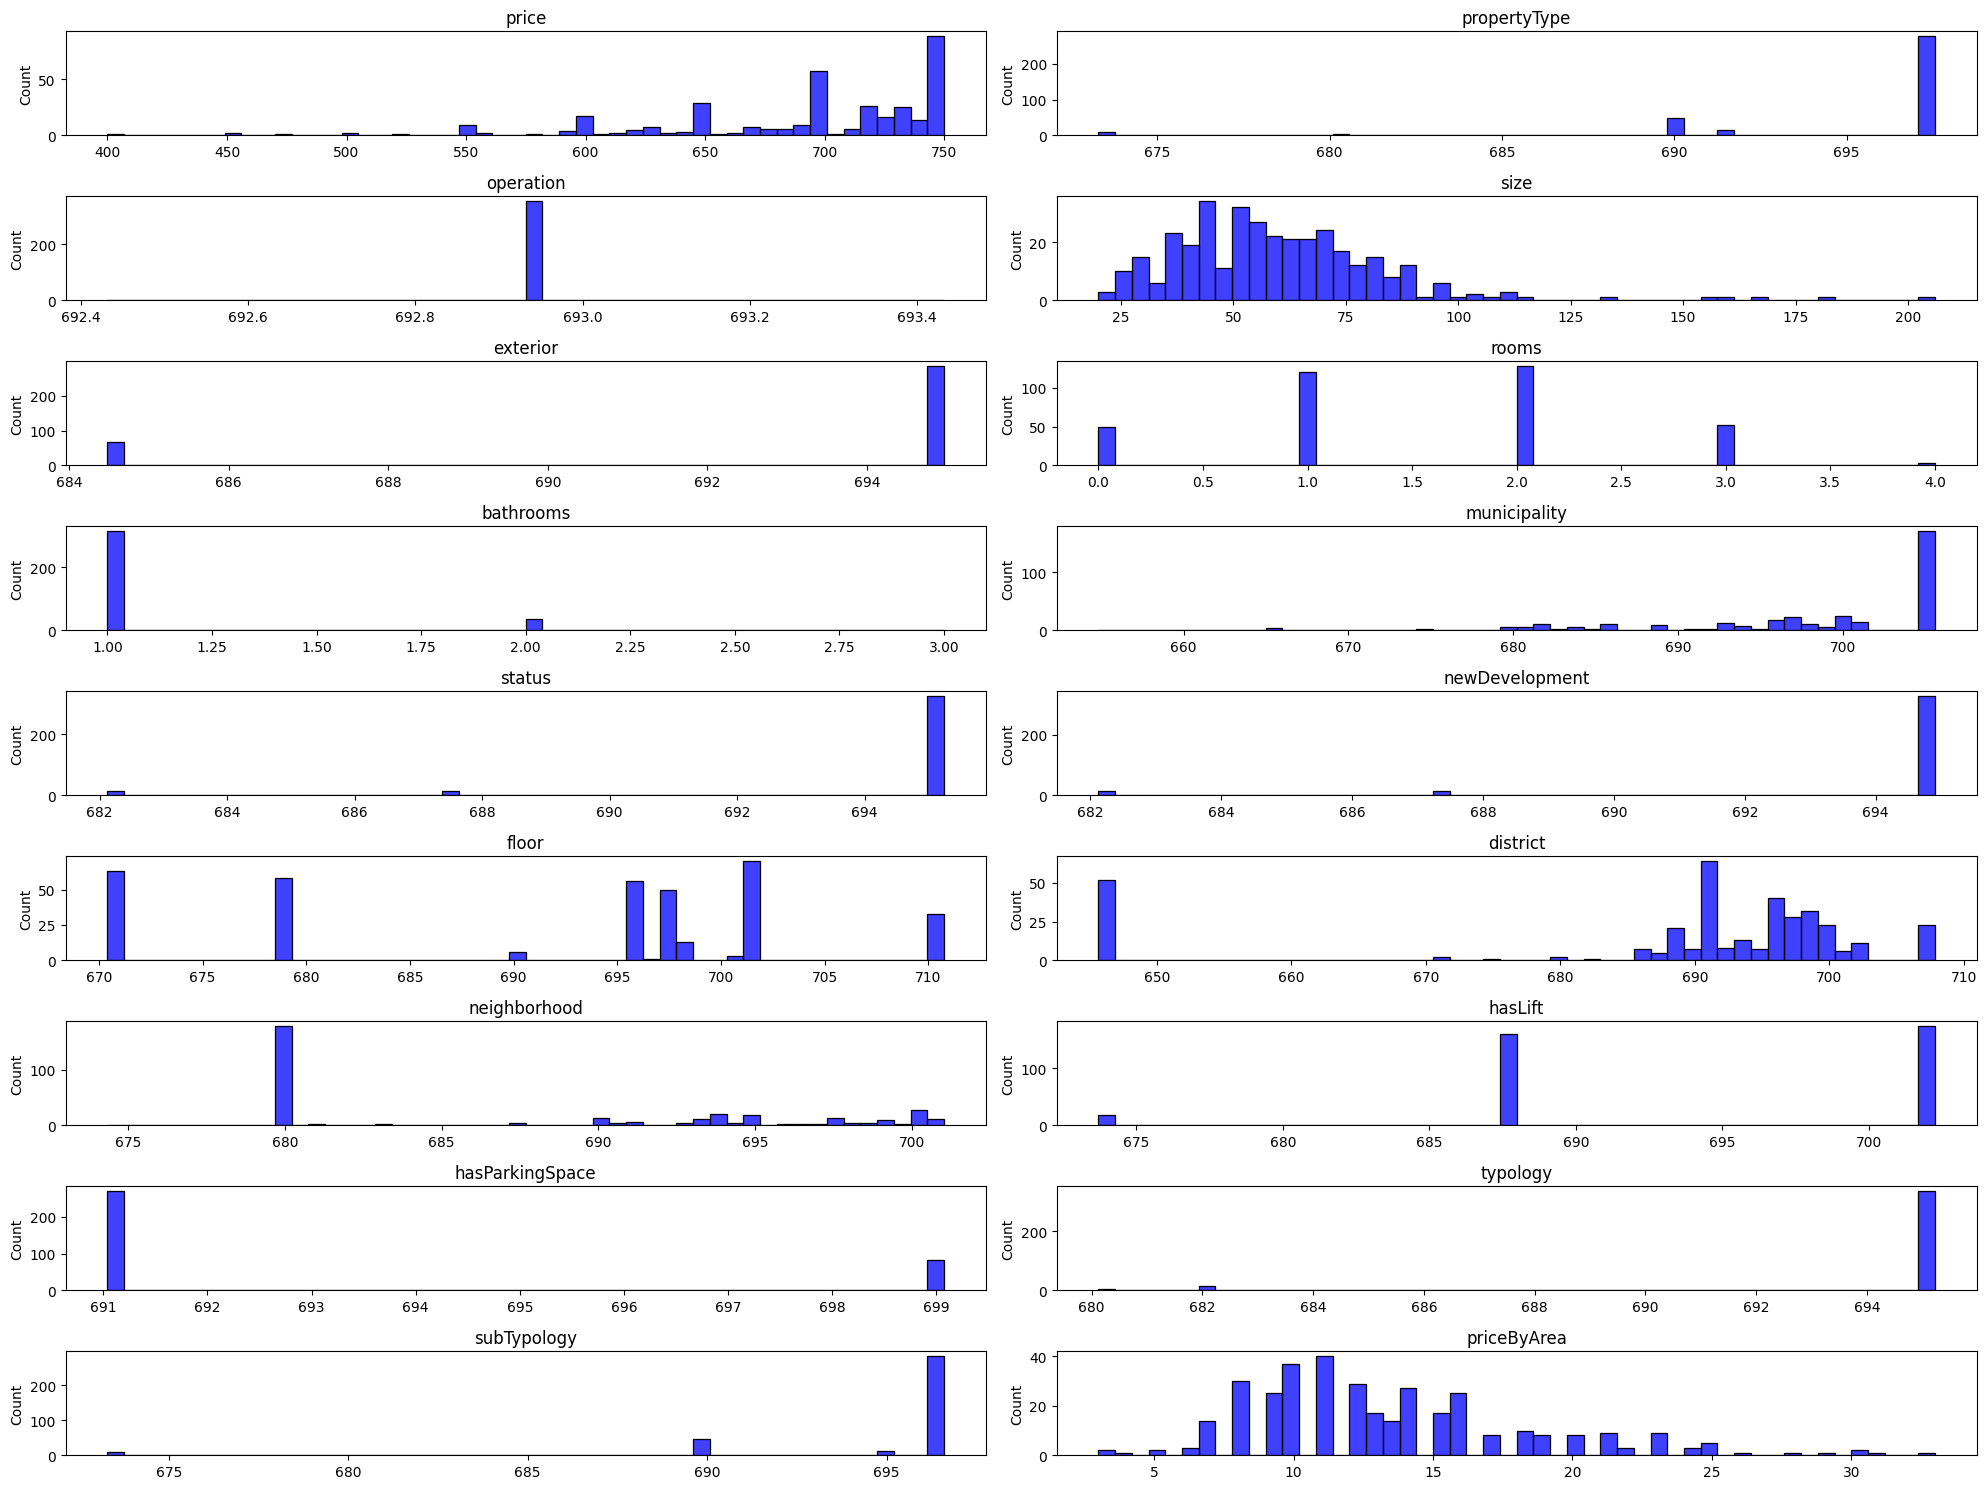

In [7]:

# llamamos al método que nos permite identificar outliers univariados de forma visual (histograma y boxplot)
gestion.visualizar_outliers_univariados()

**Debido a que la distribucion no es normal, seguimos con metodo IQR en vez de Z-Score.**

In [8]:

outliers_iqr = gestion.detectar_outliers_iqr()

La cantidad de outliers que tenemos para la columna price es 6
La cantidad de outliers que tenemos para la columna propertyType es 76
La cantidad de outliers que tenemos para la columna size es 11
La cantidad de outliers que tenemos para la columna exterior es 68
La cantidad de outliers que tenemos para la columna rooms es 3
La cantidad de outliers que tenemos para la columna bathrooms es 38
La cantidad de outliers que tenemos para la columna municipality es 13
La cantidad de outliers que tenemos para la columna status es 29
La cantidad de outliers que tenemos para la columna newDevelopment es 27
La cantidad de outliers que tenemos para la columna district es 55
La cantidad de outliers que tenemos para la columna hasParkingSpace es 83
La cantidad de outliers que tenemos para la columna typology es 18
La cantidad de outliers que tenemos para la columna subTypology es 70
La cantidad de outliers que tenemos para la columna priceByArea es 7


In [9]:
# instanciamos la clase de indentificación de Outliers Multivariados
gestion_multi= so.GestionOutliersMultivariados(df)

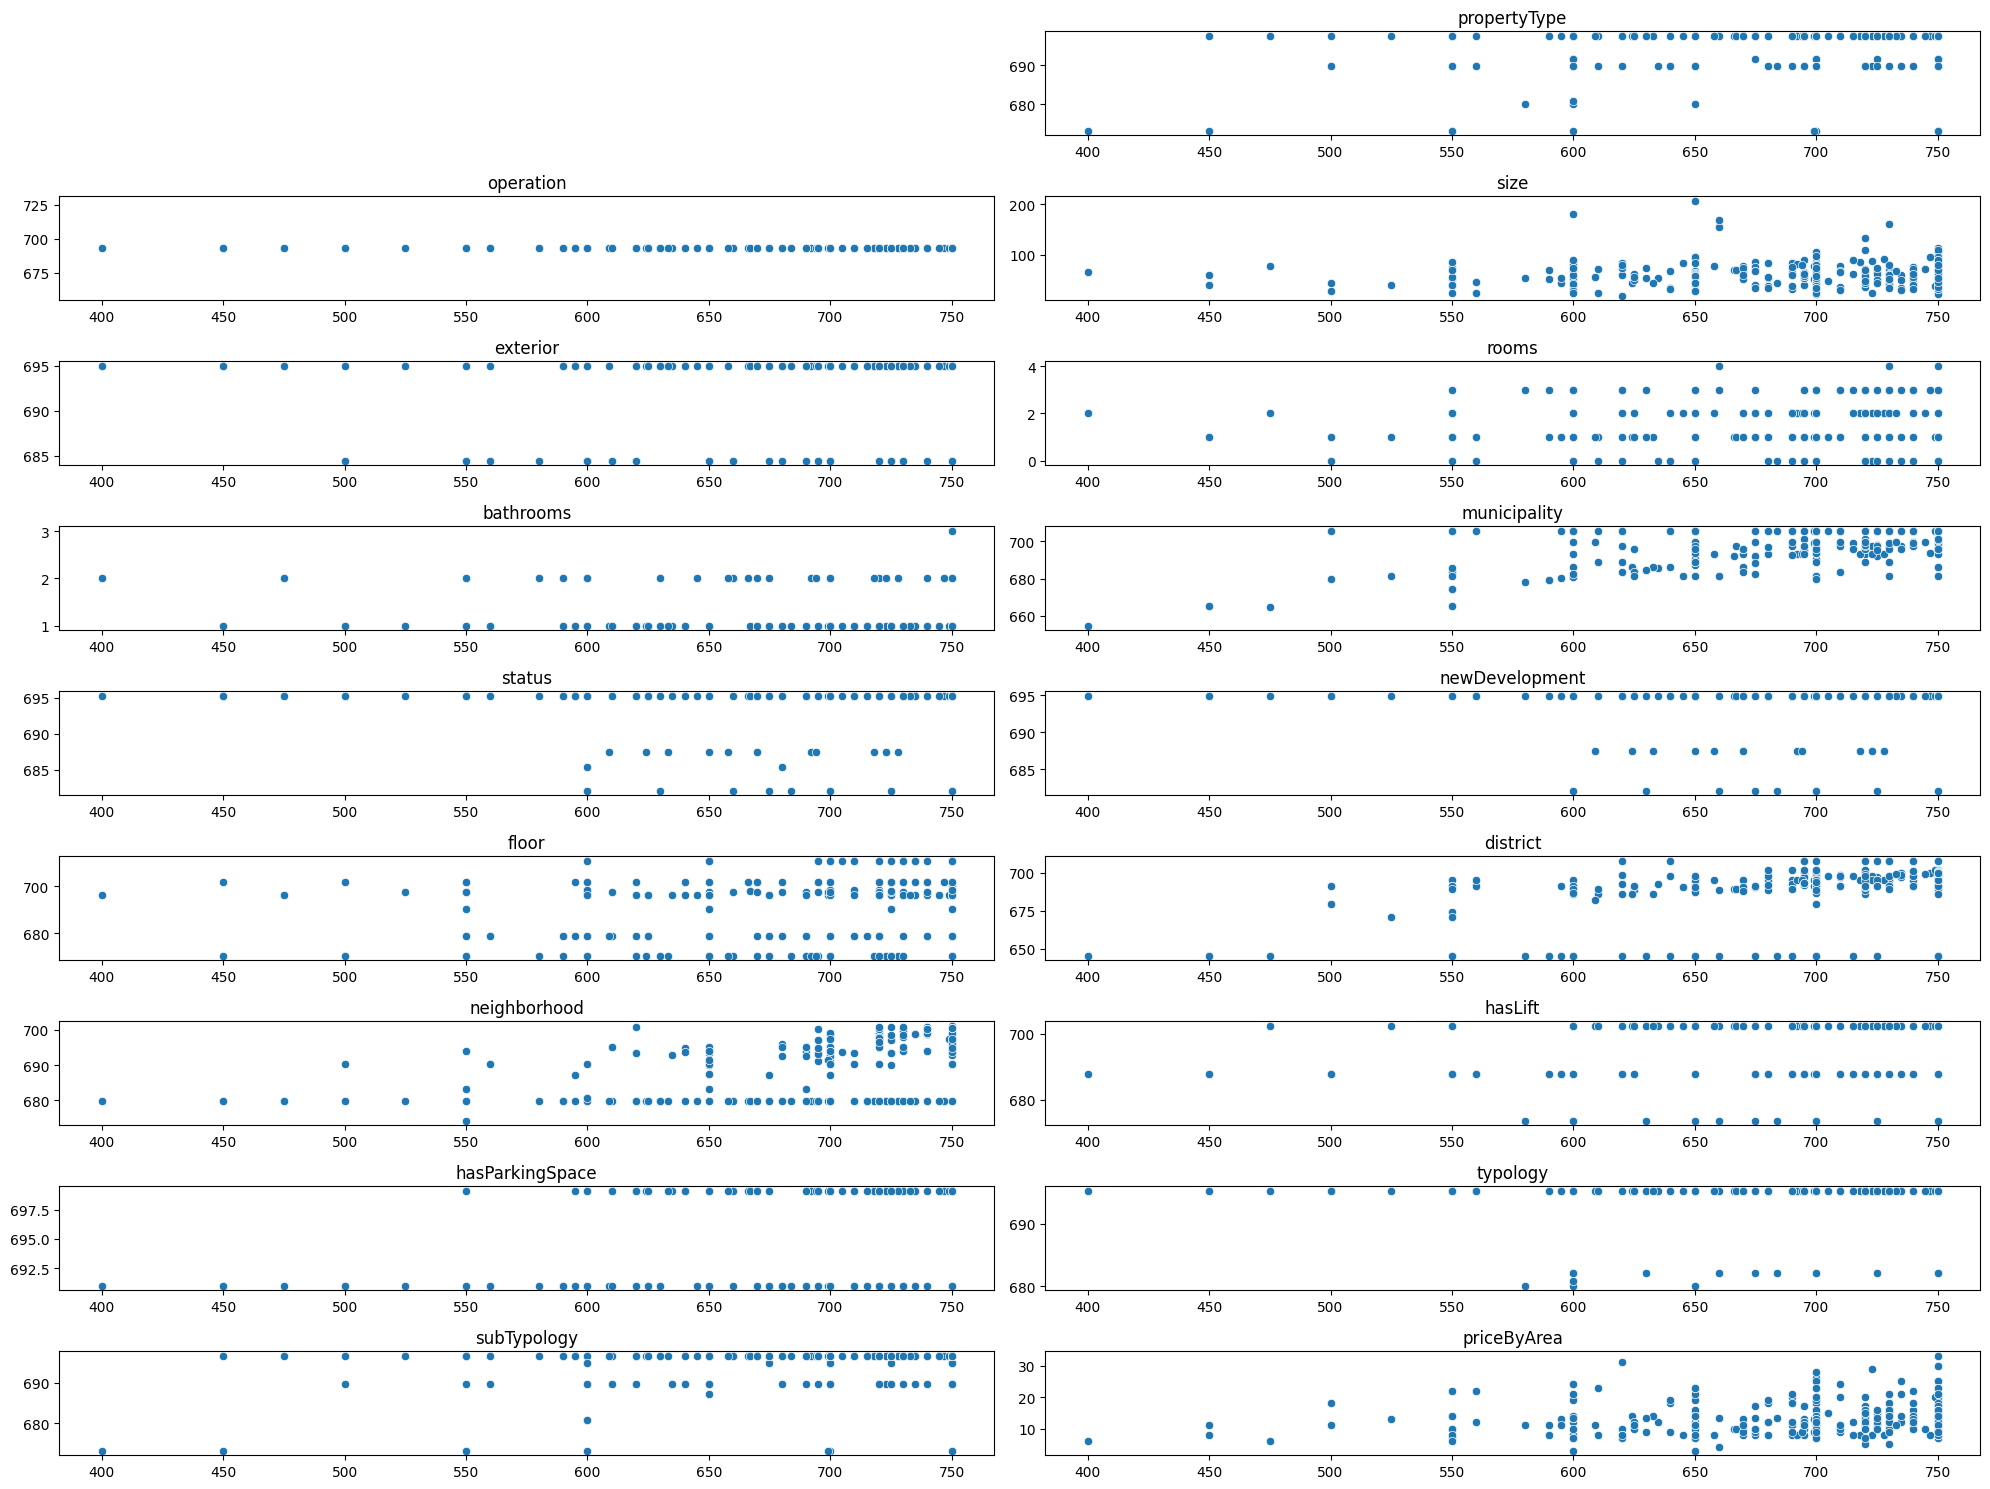

In [10]:
gestion_multi.visualizar_outliers_bivariados("price")

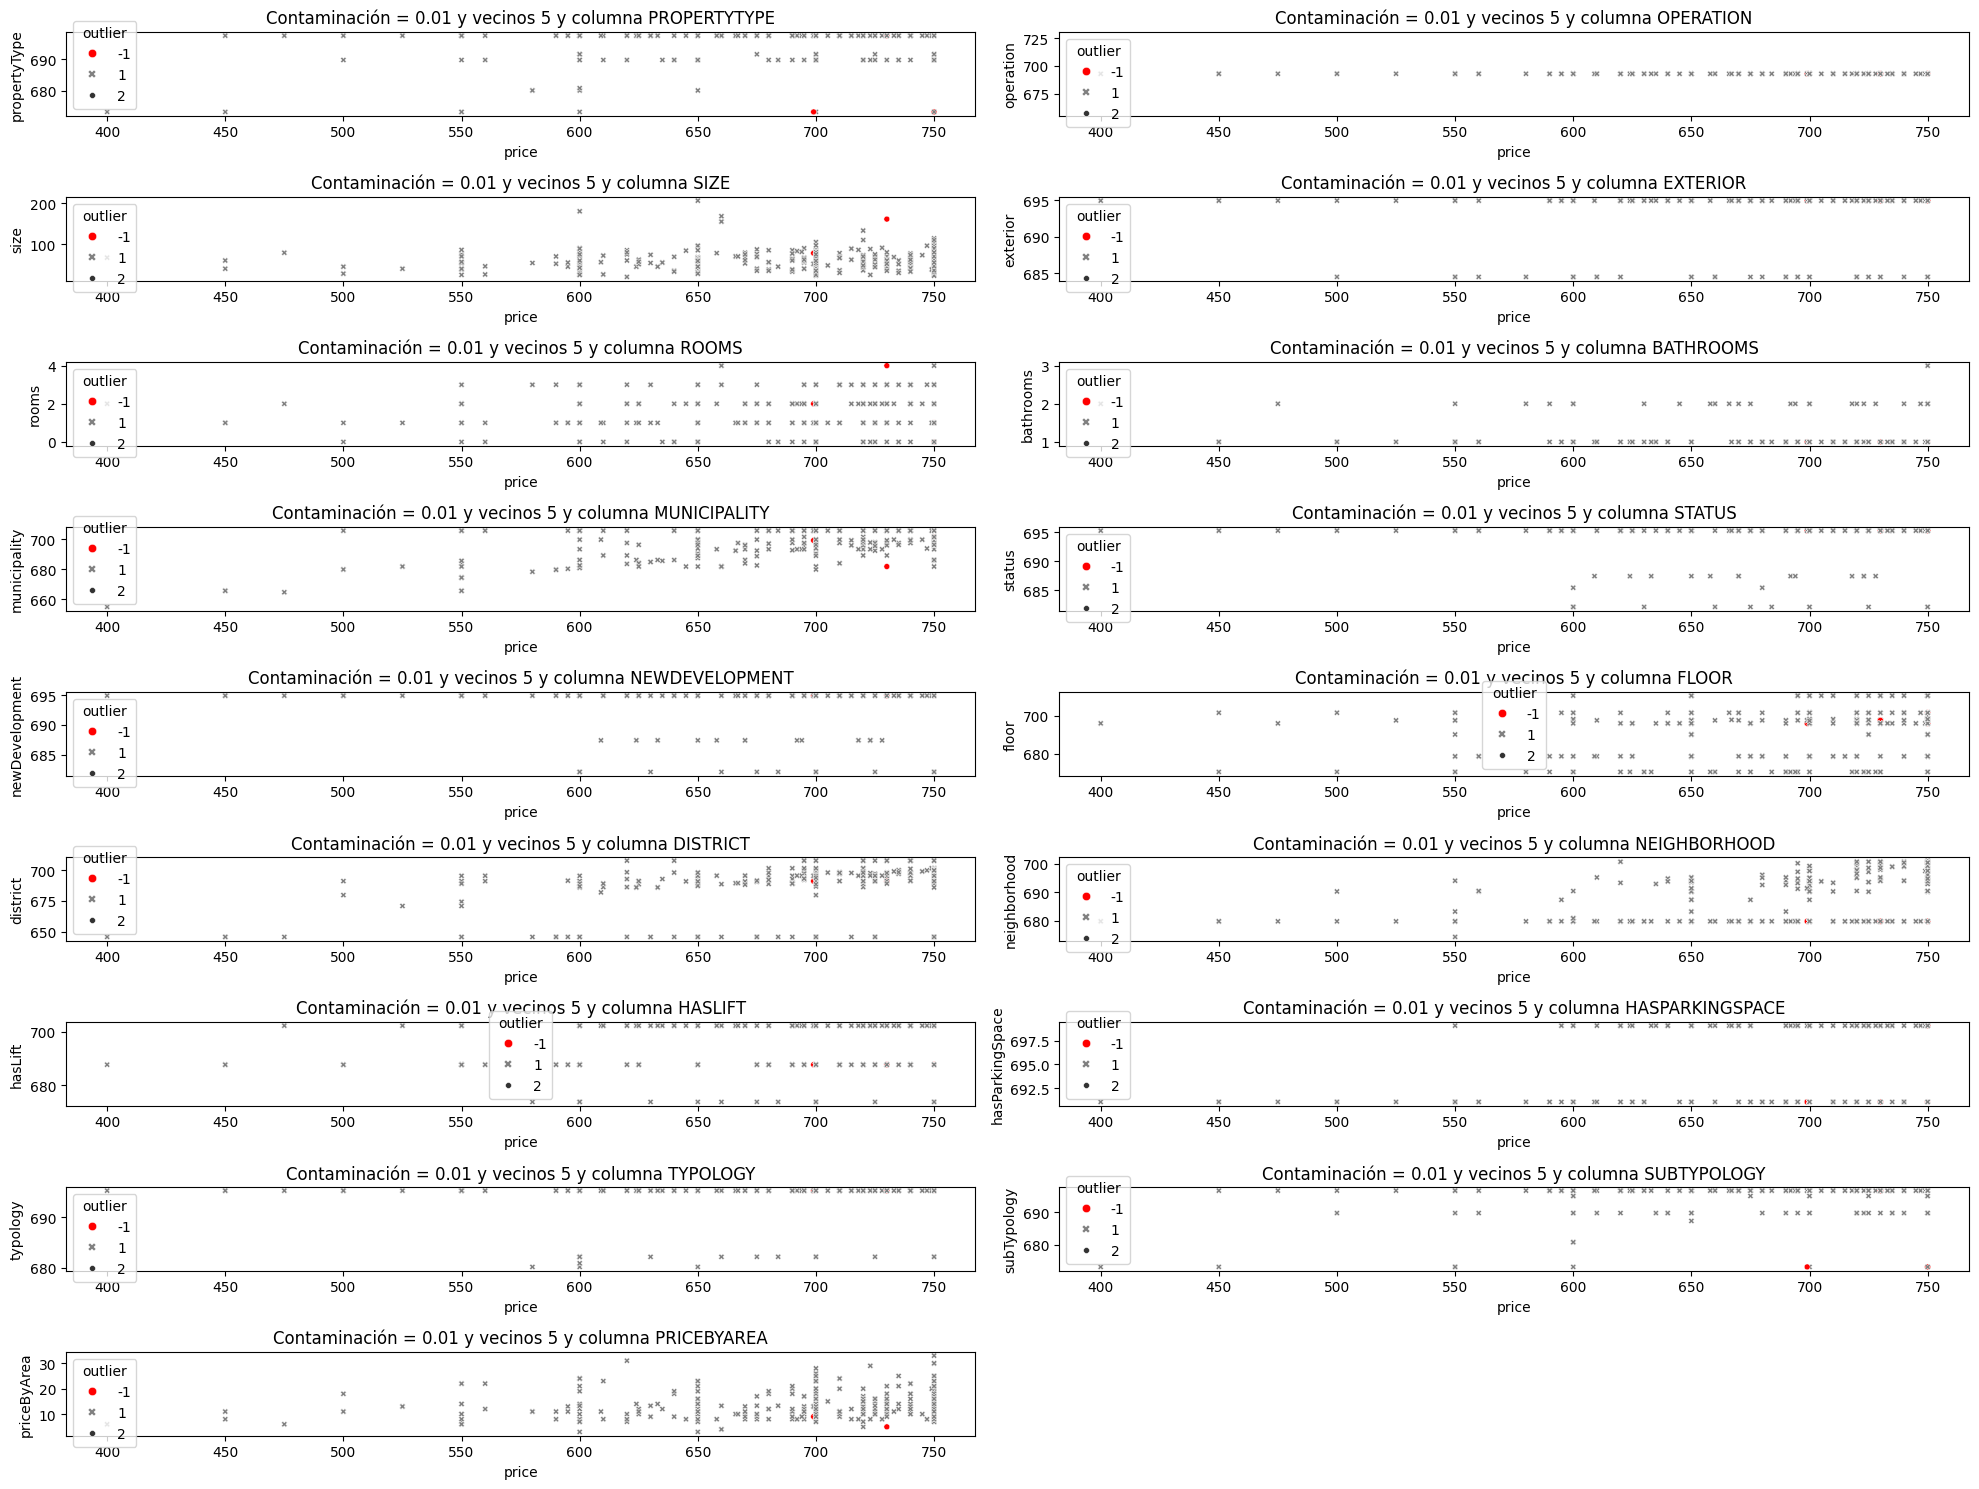

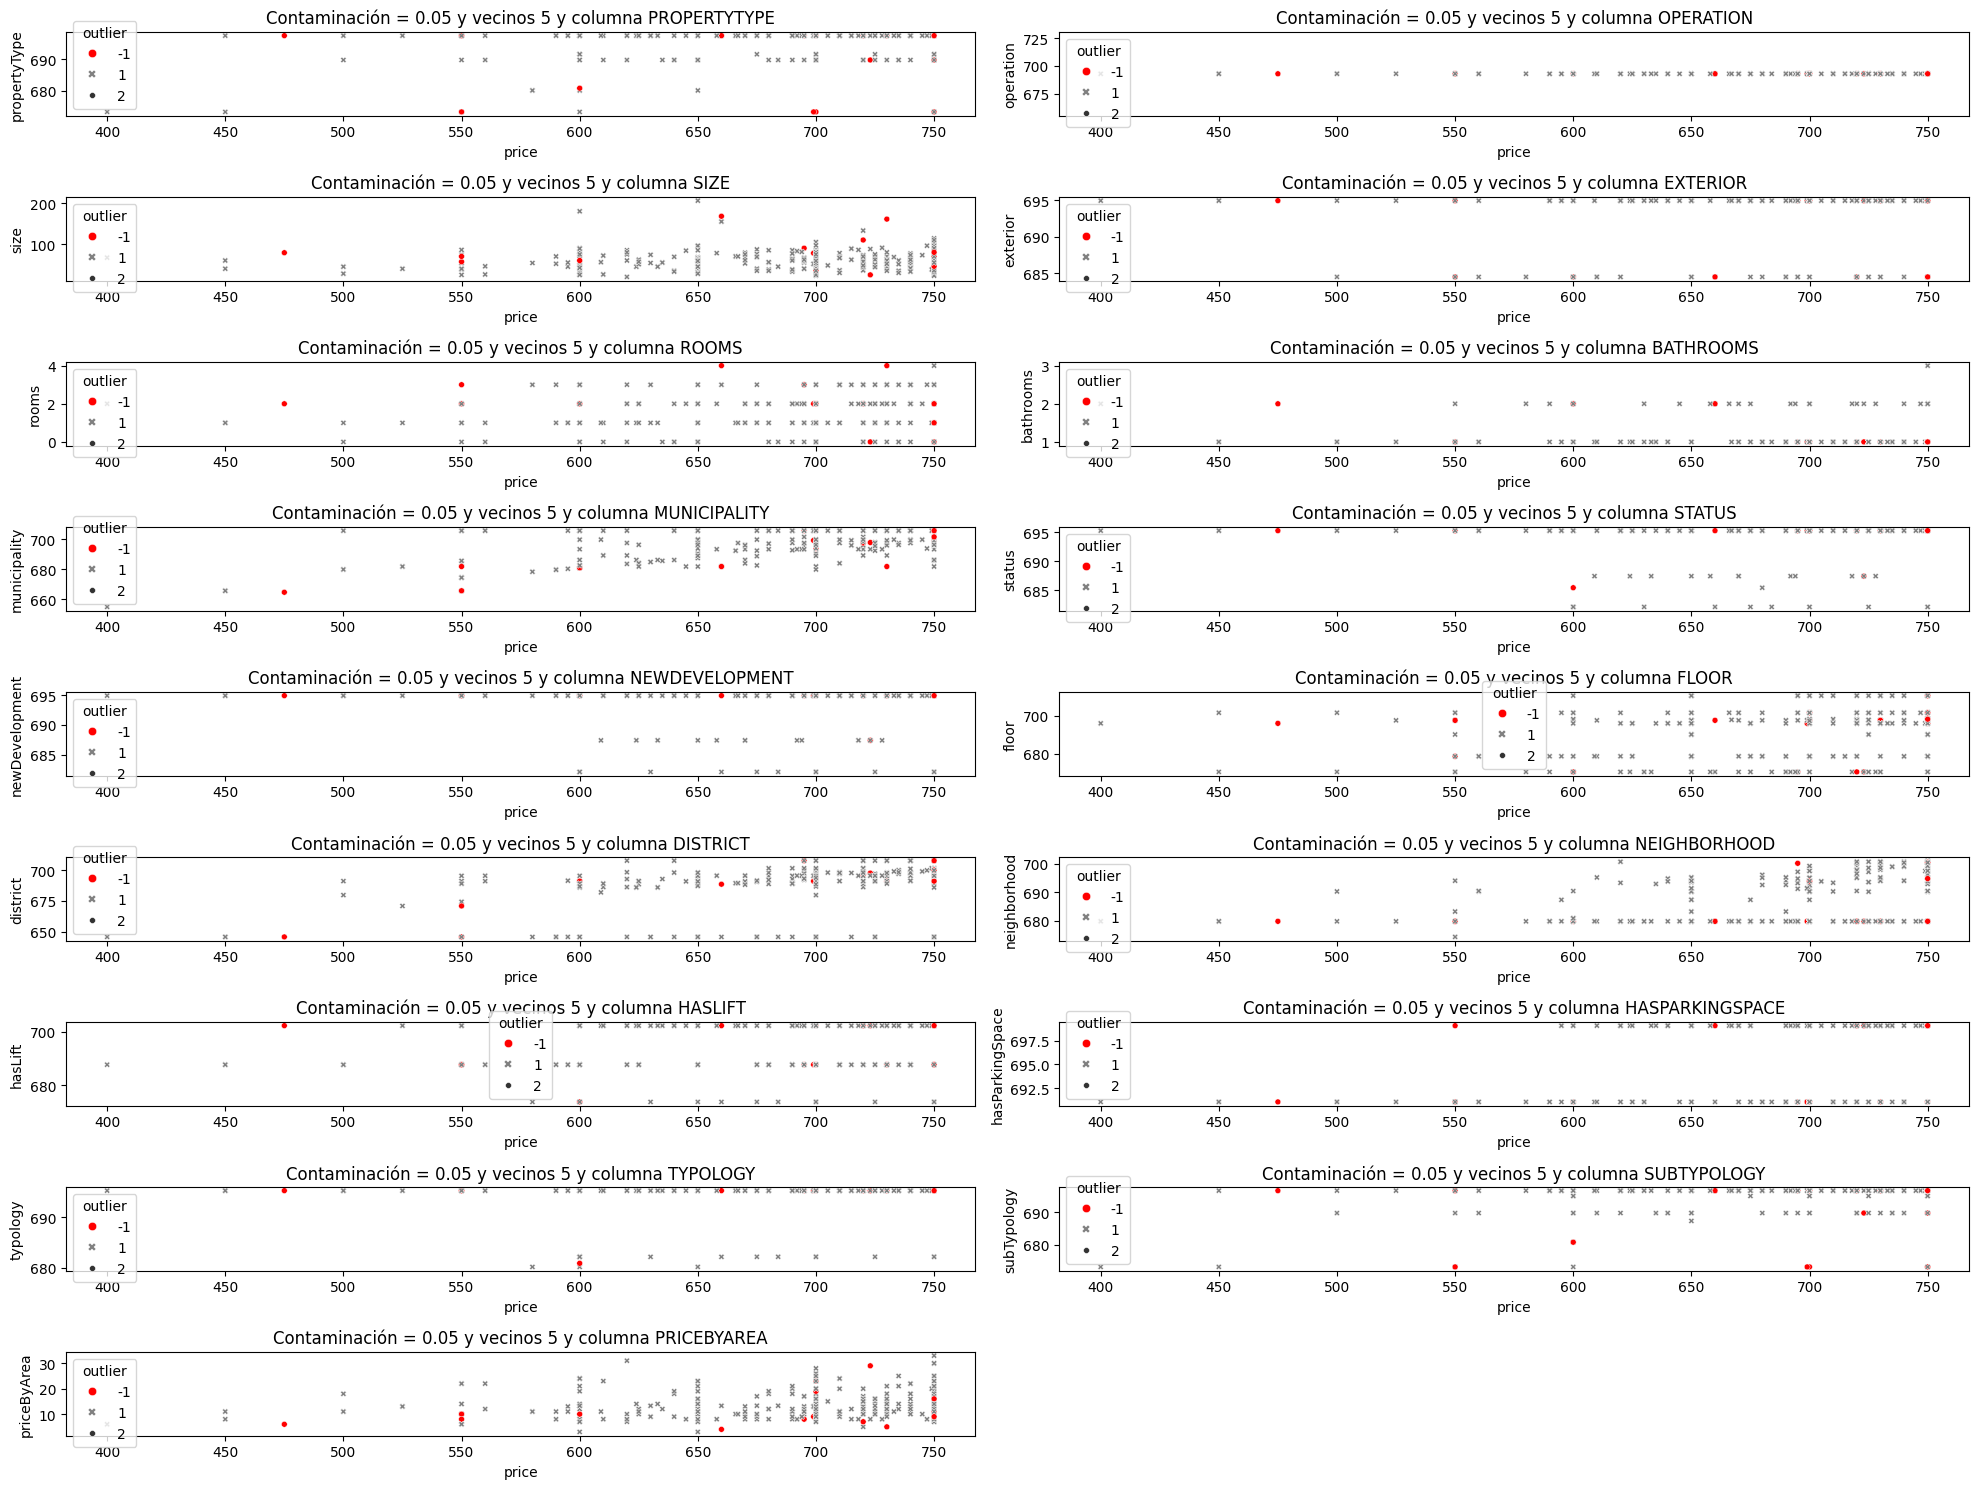

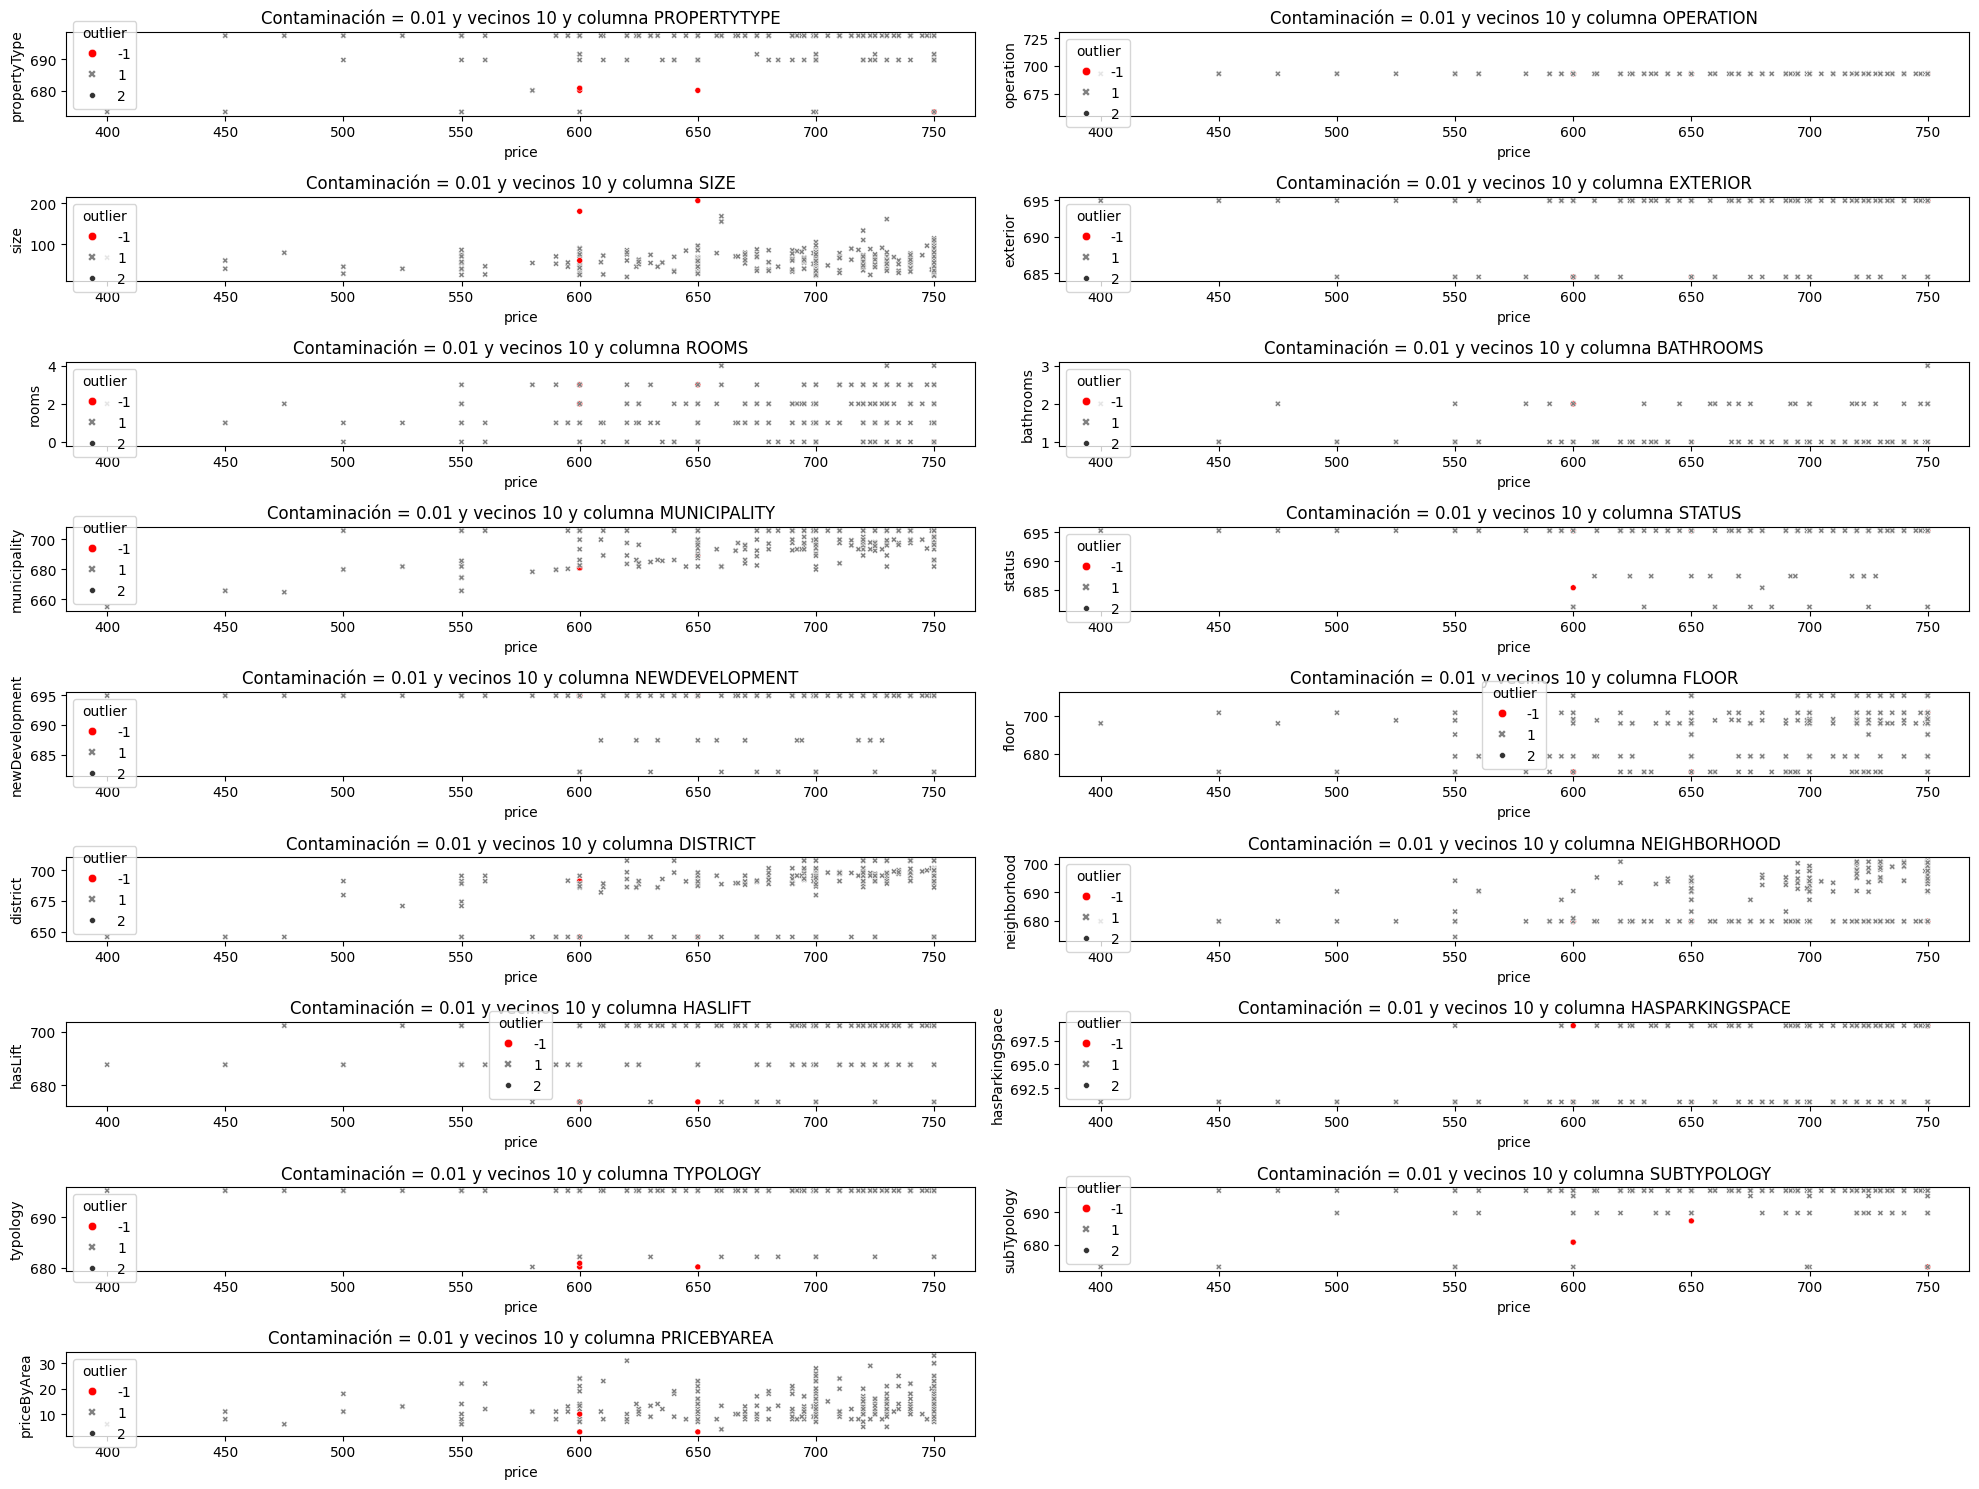

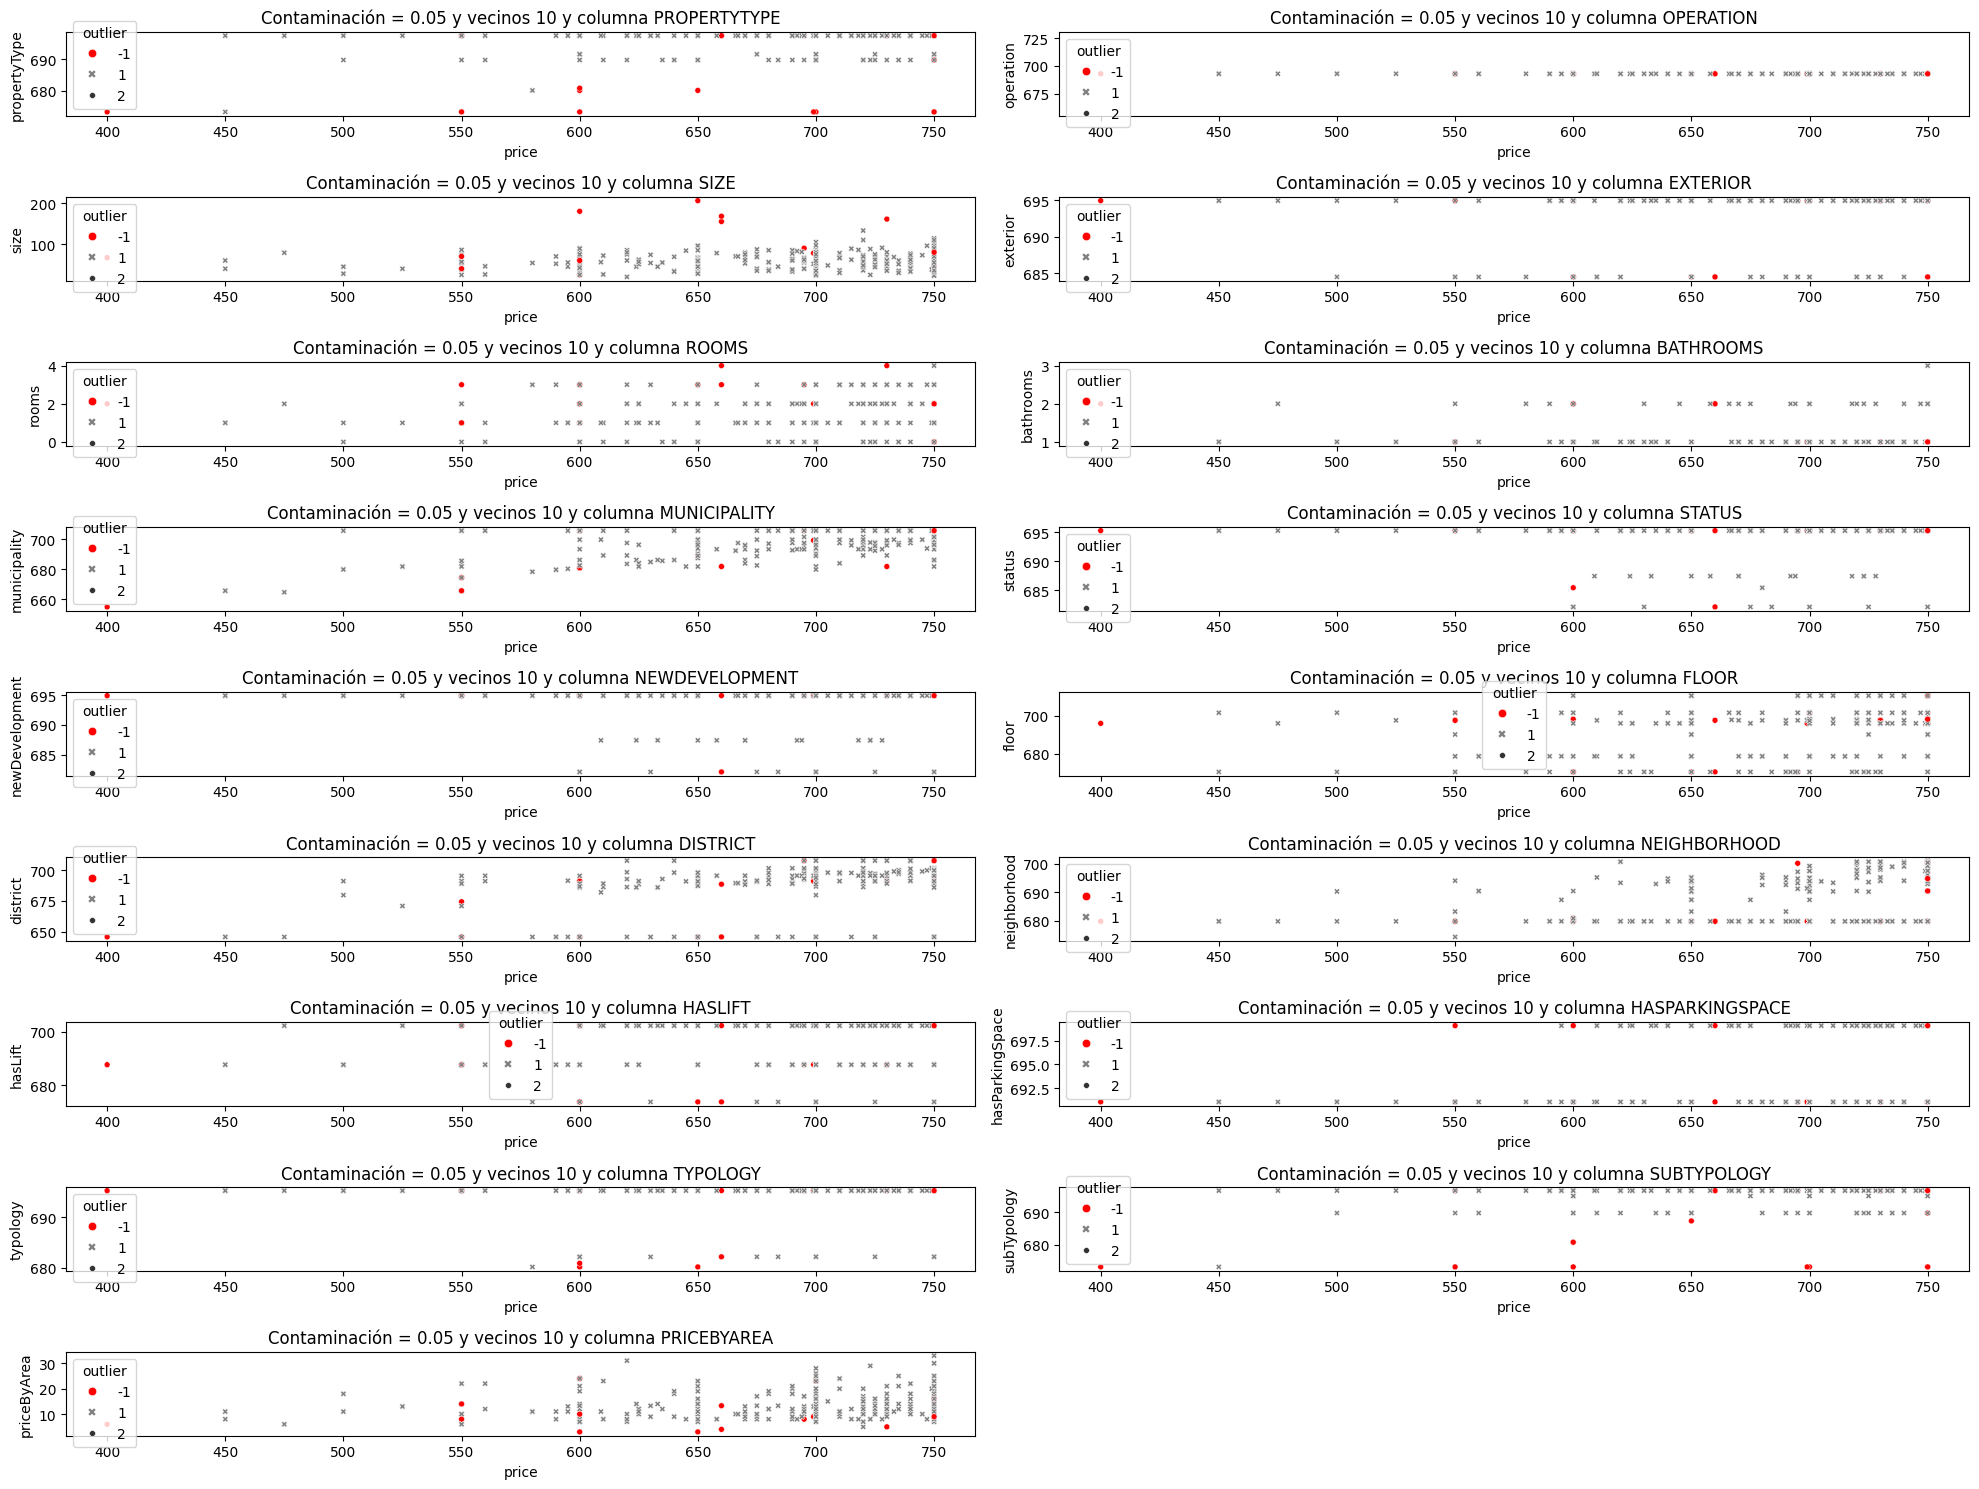

In [11]:
gestion_multi.explorar_outliers_lof("price", indice_contaminacion=[0.01, 0.05], vecinos=[5,10])

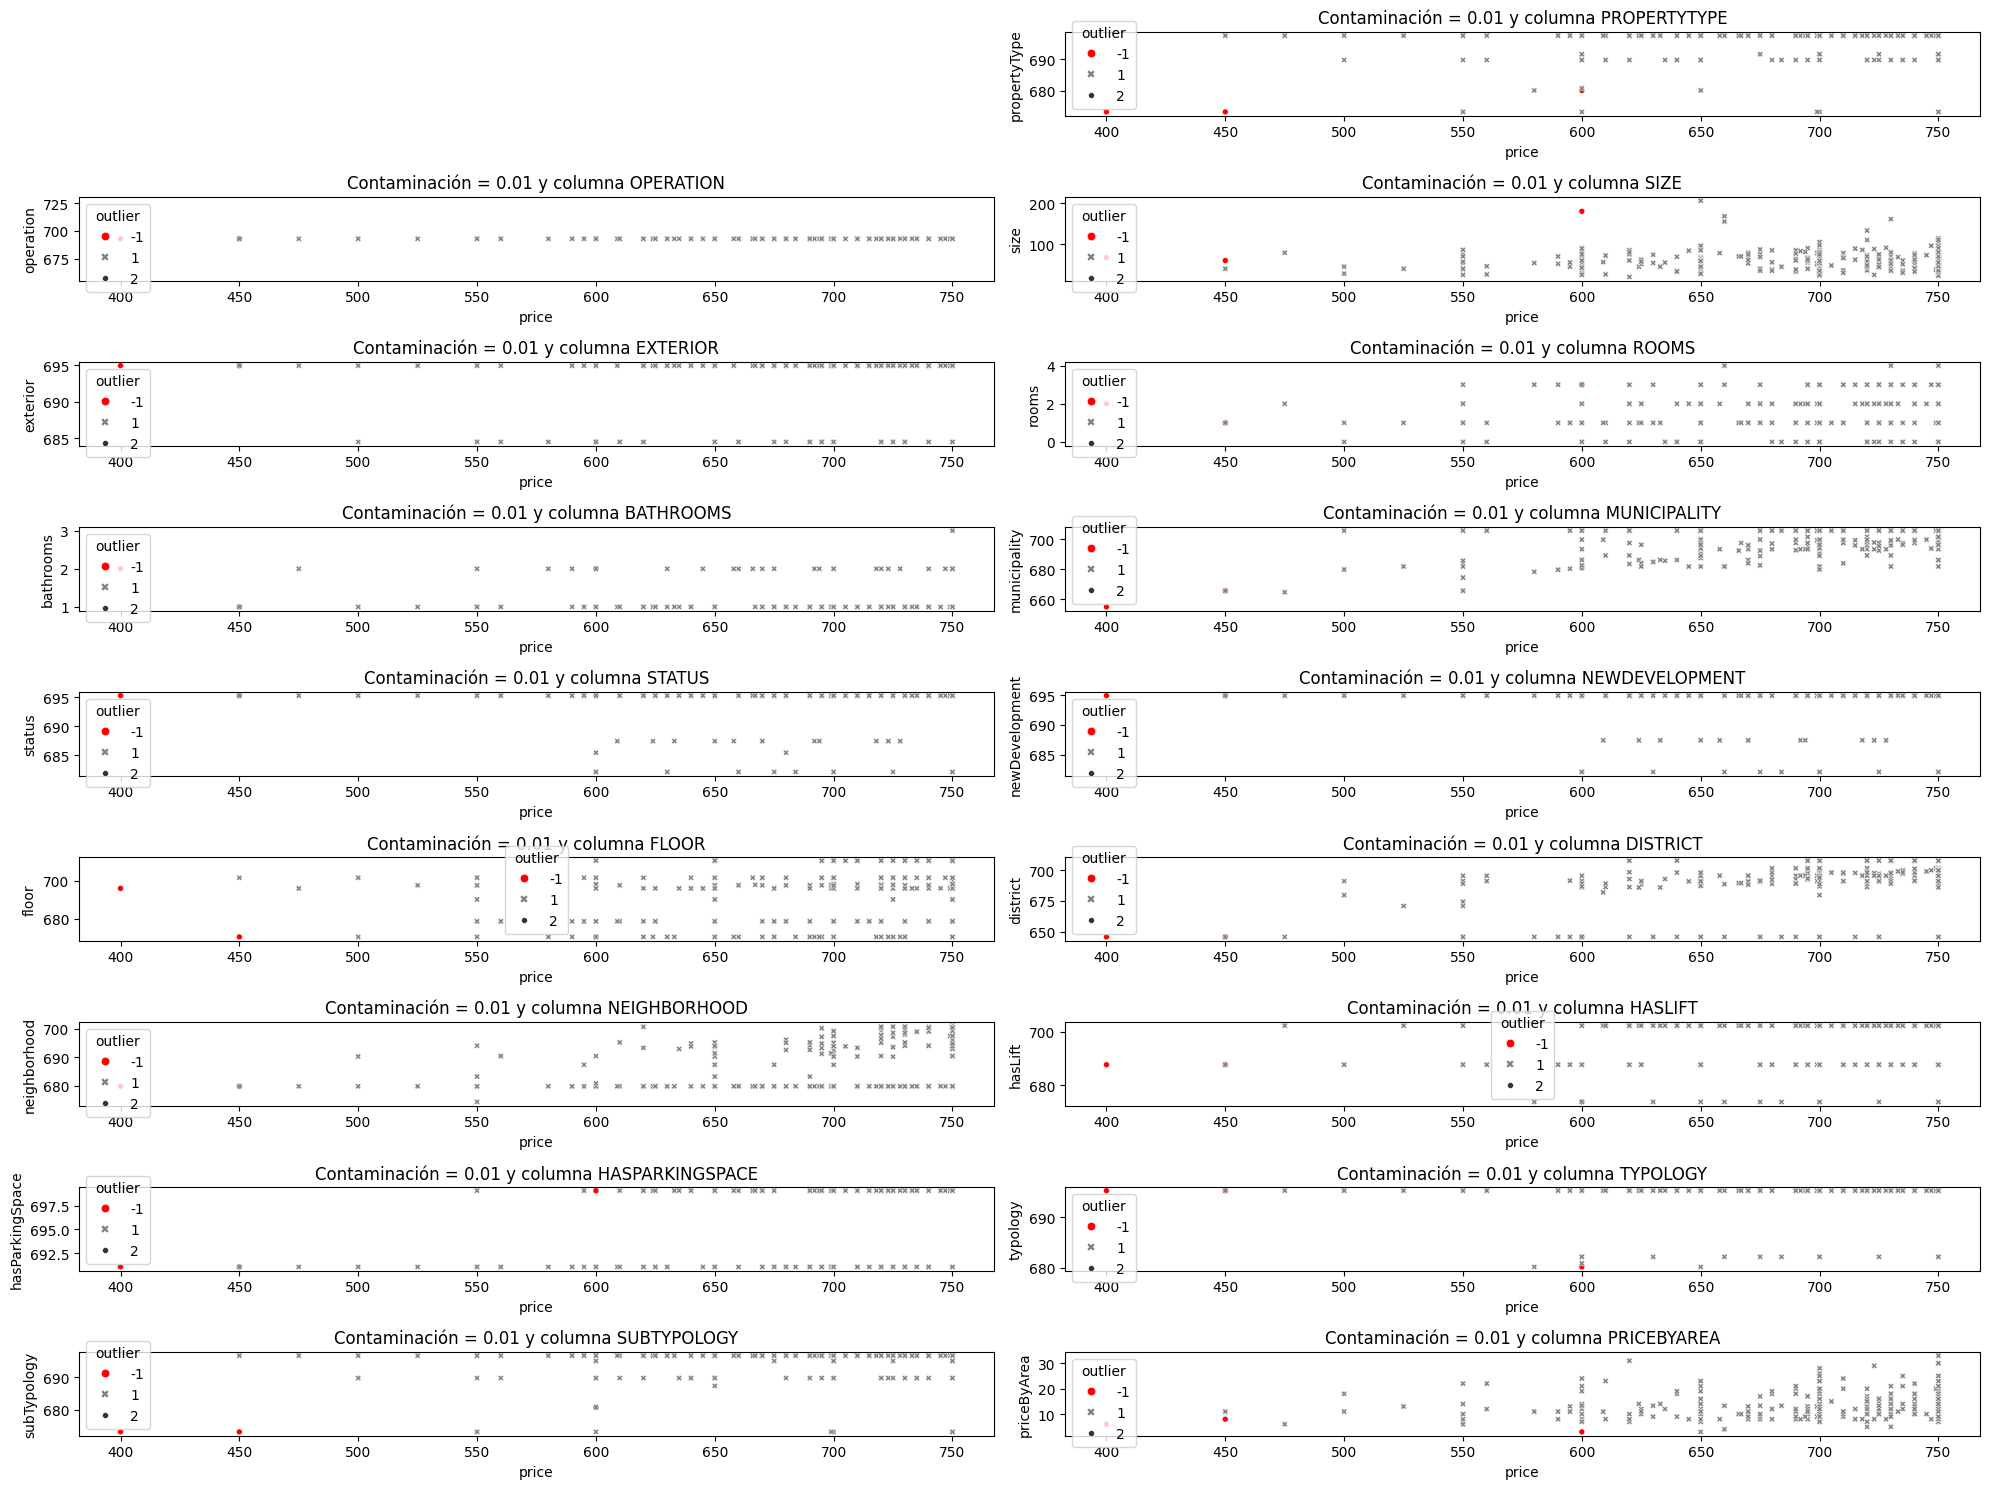

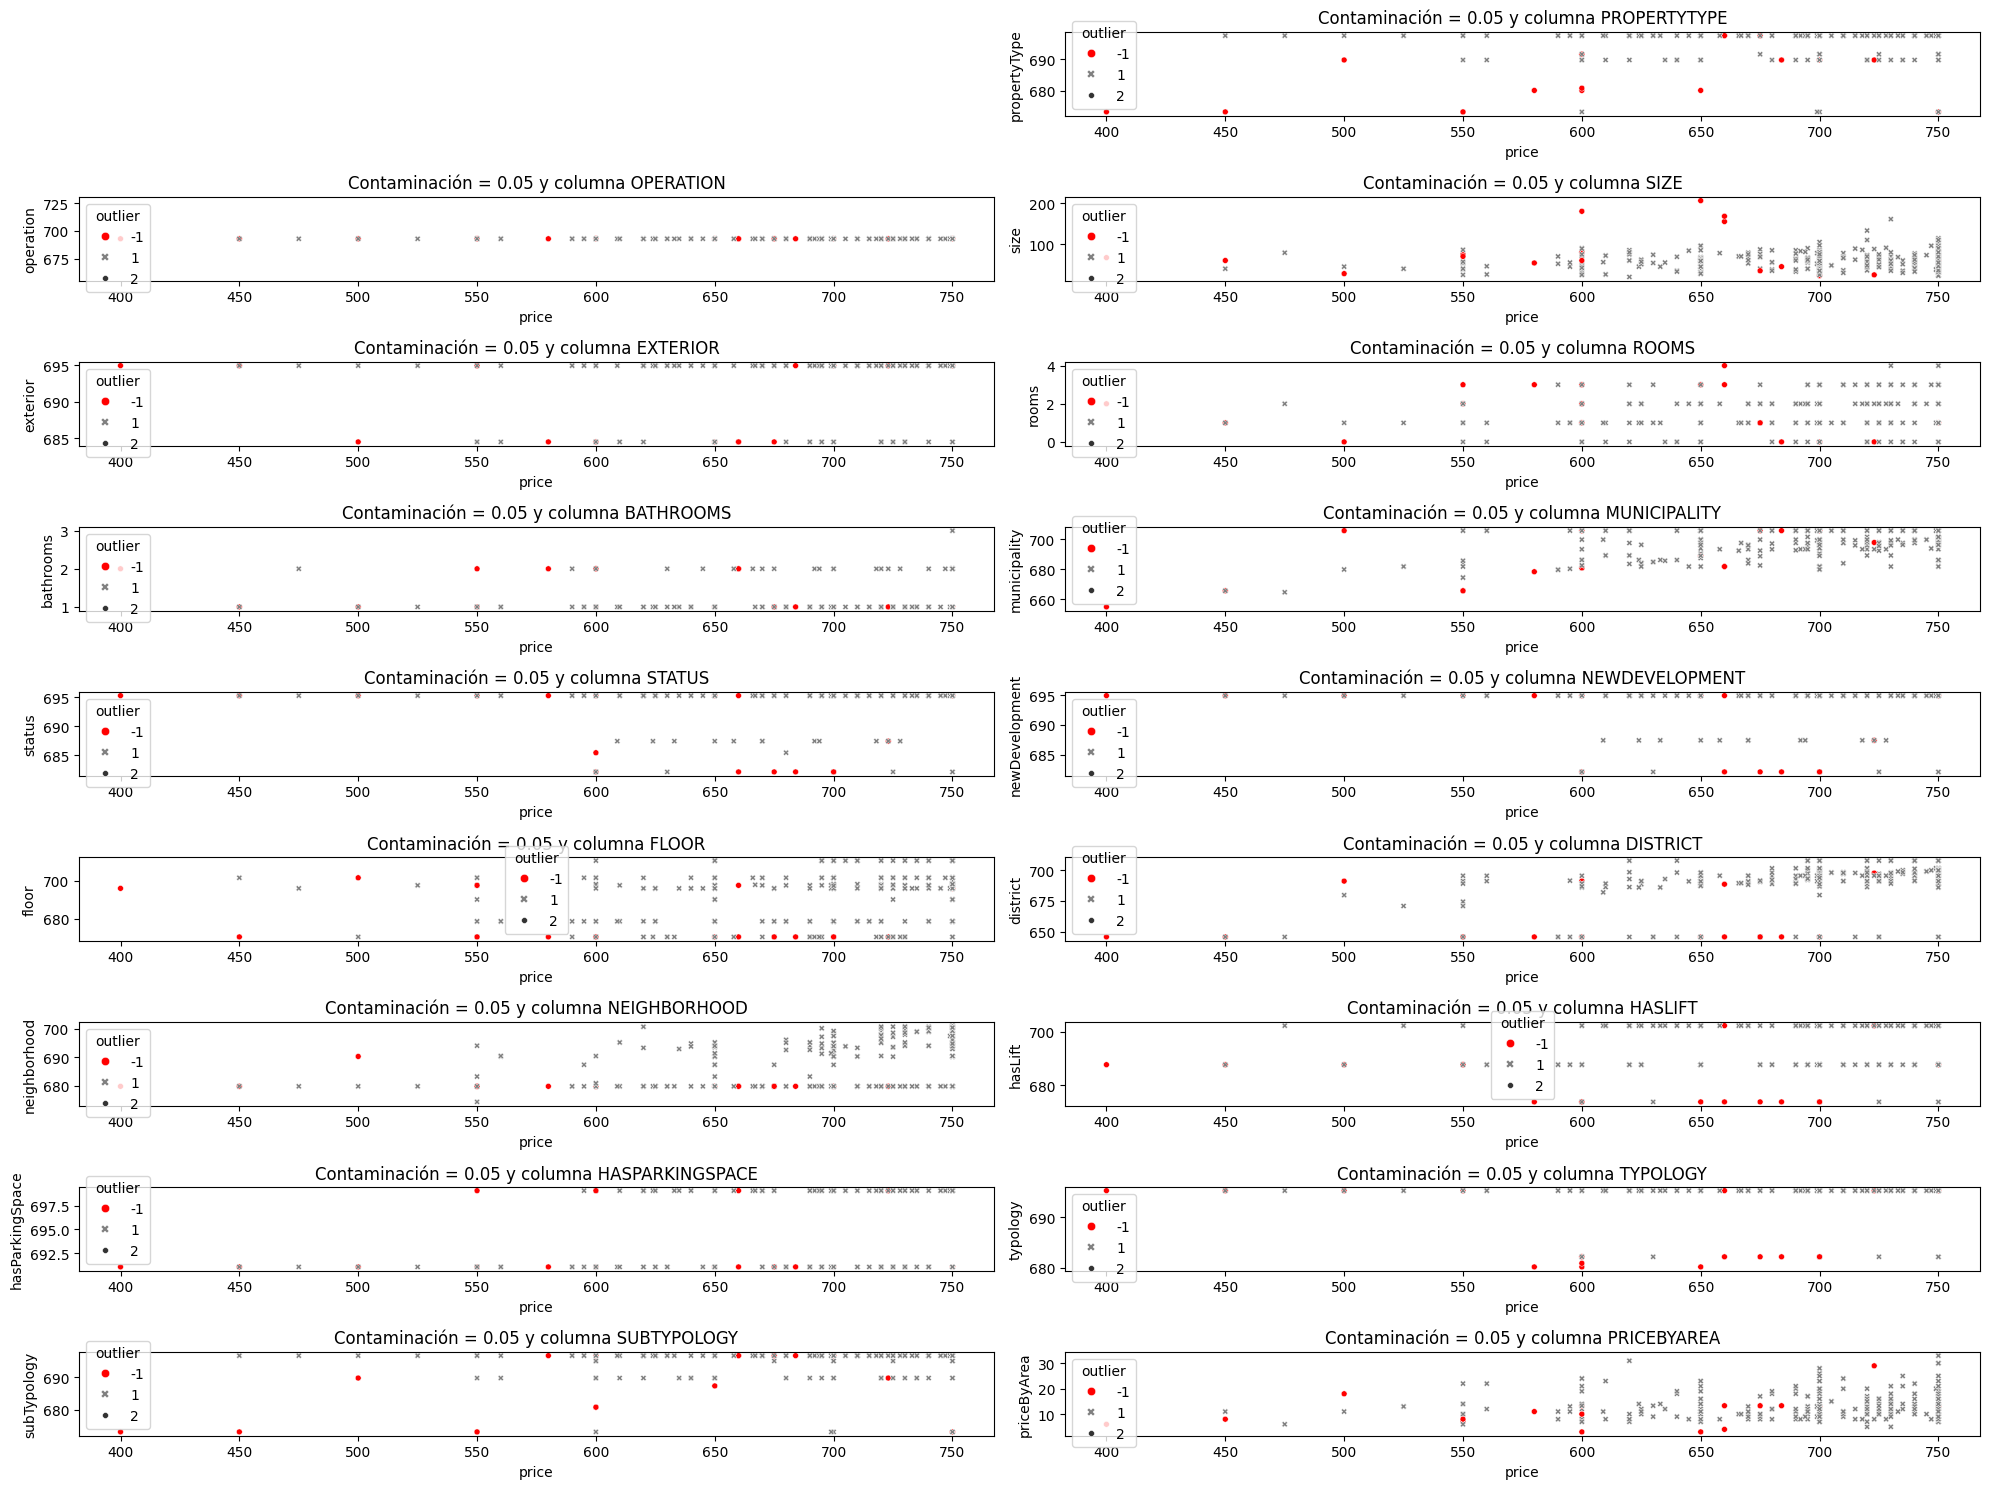

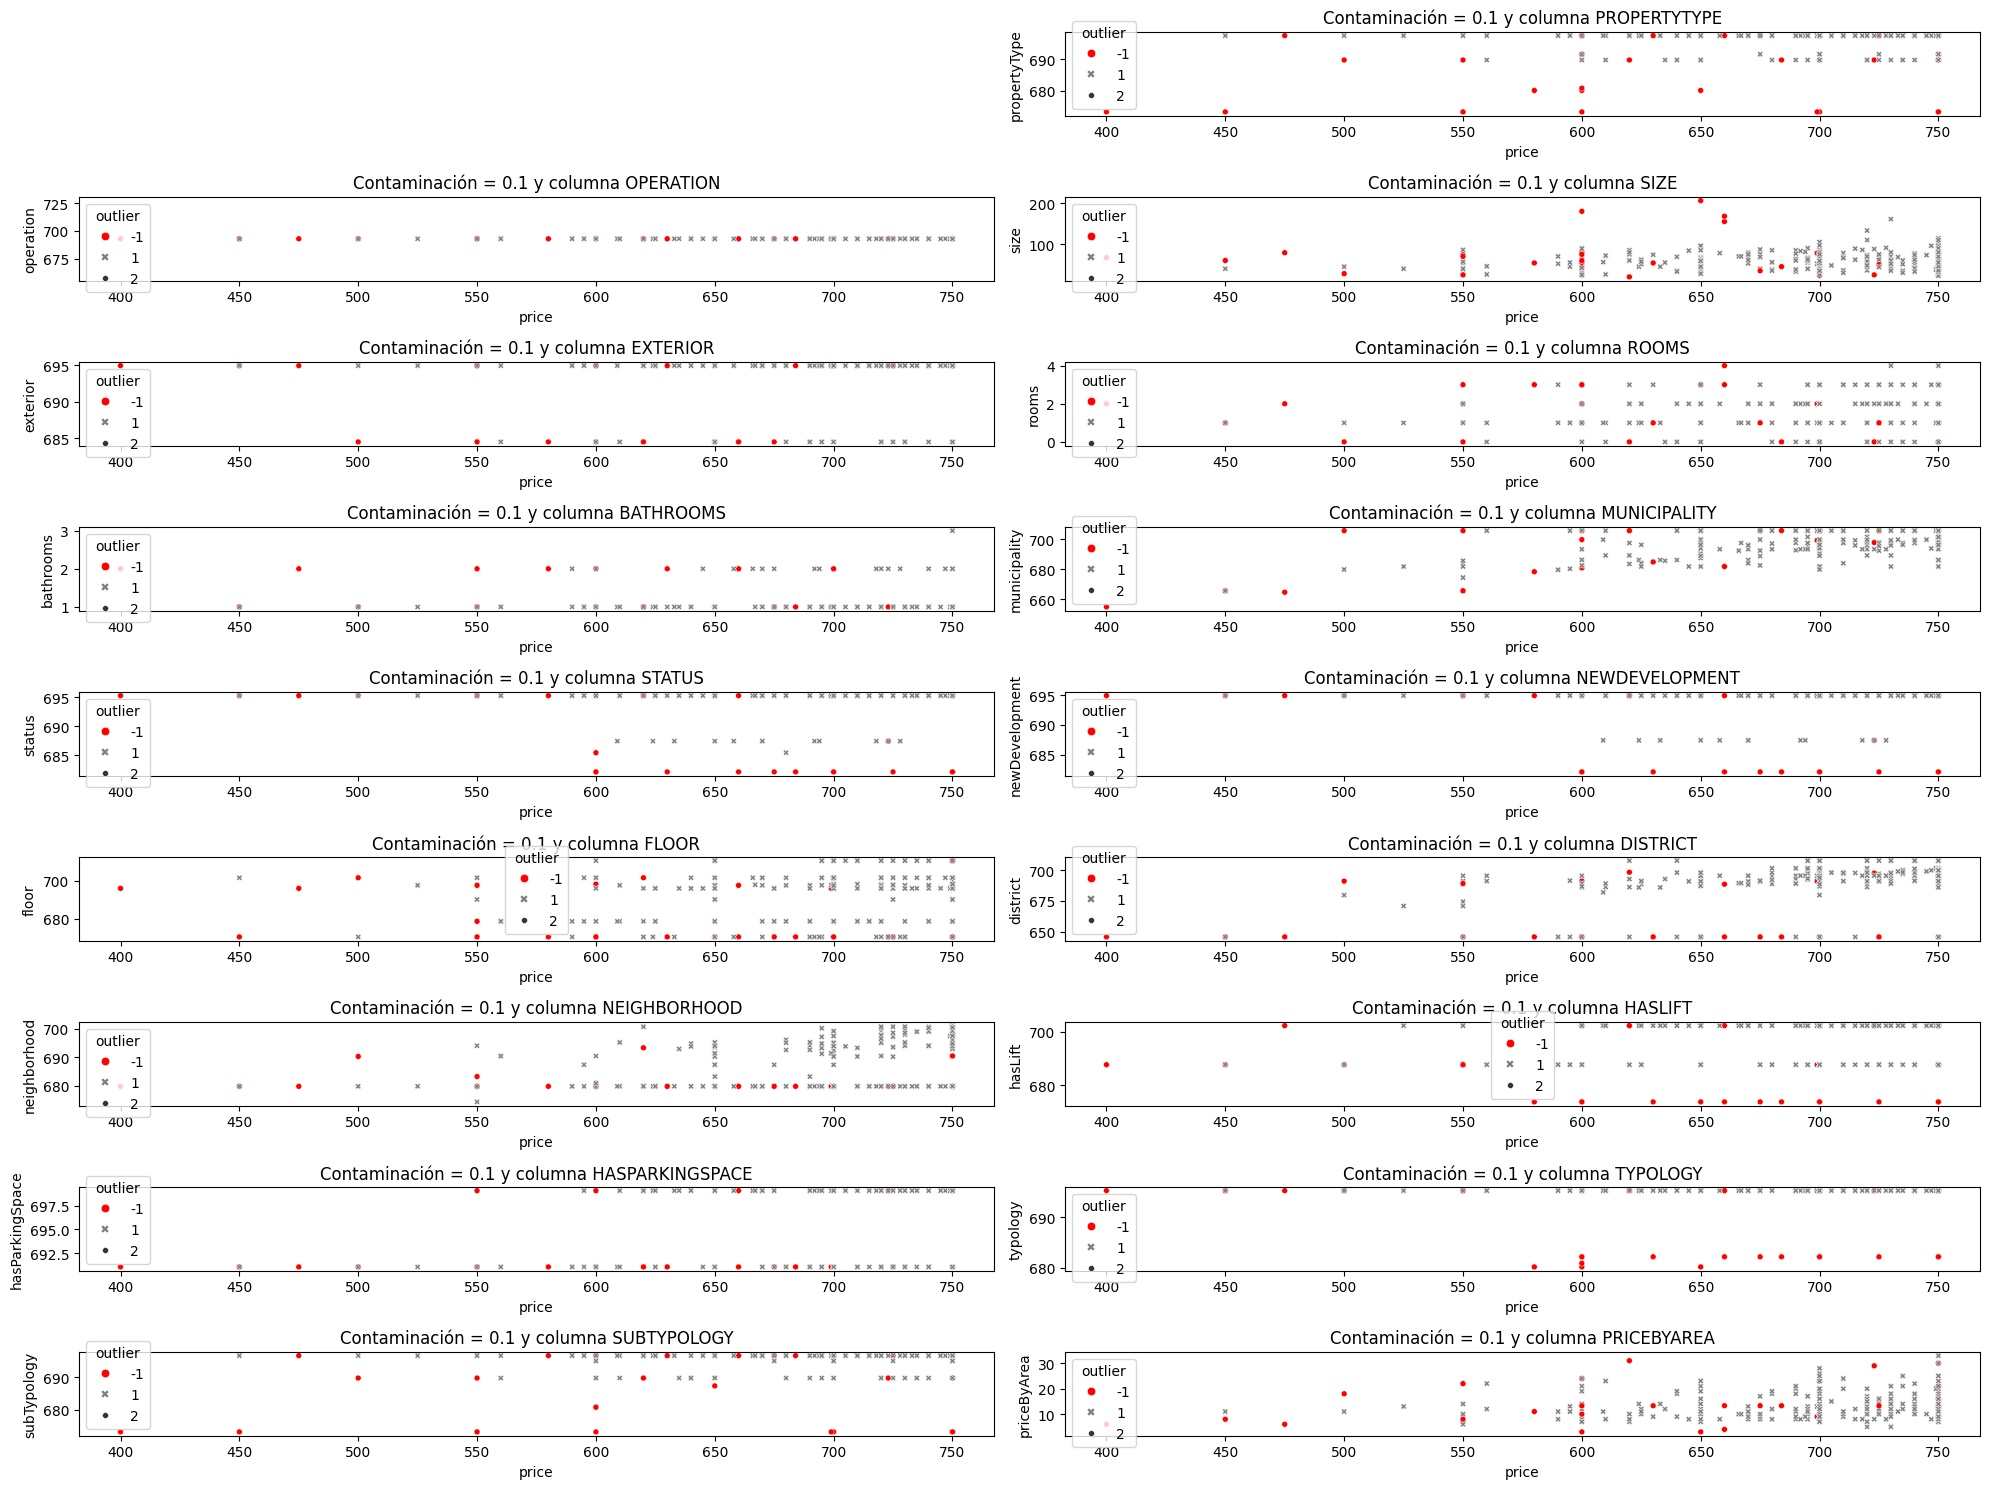

In [12]:
gestion_multi.explorar_outliers_if("price",estimadores=10)

In [13]:
# instanciamos la clase de indentificación de Outliers Multivariados
gestion_multi_sin_v_respuesta= so.GestionOutliersMultivariados(df)

In [14]:
df_outliers = gestion_multi_sin_v_respuesta.detectar_outliers_lof(contaminacion=0.05,n_neighbors=5)

In [15]:
df_outliers.head(3)

price  propertyType   operation  size    exterior  rooms  bathrooms  \
0  750.0    697.559567  692.932011  60.0  694.964912      1          1   
1  750.0    697.559567  692.932011  70.0  694.964912      2          1   
2  400.0    673.290678  692.932011  67.0  694.964912      2          2   

   municipality      status  newDevelopment       floor    district  \
0    705.594114  695.243827      694.904908  697.689843  701.253737   
1    701.418584  695.243827      694.904908  678.664014  700.208637   
2    654.819074  695.243827      694.904908  696.092223  645.657771   

   neighborhood     hasLift  hasParkingSpace    typology  subTypology  \
0    700.317911  702.252872       691.040741  695.226866   696.600707   
1    679.793298  687.633544       691.040741  695.226866   696.600707   
2    679.793298  687.633544       691.040741  695.226866   673.290678   

   priceByArea  outlier  
0         13.0        1  
1         11.0        1  
2          6.0       -1

In [16]:
df_temp = df_outliers[df_outliers["outlier"] == -1]

In [17]:
df_temp.shape[0]

18

In [18]:
porcentaje = 100 * df_temp.shape[0] / df_outliers.shape[0]
print(f"el {round(porcentaje)} % de los datos se van a imputar de outlaier")

el 5 % de los datos se van a imputar de outlaier


In [19]:
# llamamos al método que nos permite imputar los outliers
df_final = gestion_multi_sin_v_respuesta.imputar_outliers(data = df_outliers, metodo = "mediana")
df_final.head()

price  propertyType   operation  size    exterior  rooms  bathrooms  \
0  750.0    697.559567  692.932011  60.0  694.964912      1          1   
1  750.0    697.559567  692.932011  70.0  694.964912      2          1   
2  700.0    697.559567  692.932011  55.0  694.964912      2          1   
3  590.0    697.559567  692.932011  70.0  694.964912      3          2   
4  684.0    689.814572  692.932011  45.0  694.964912      0          1   

   municipality      status  newDevelopment       floor    district  \
0    705.594114  695.243827      694.904908  697.689843  701.253737   
1    701.418584  695.243827      694.904908  678.664014  700.208637   
2    701.418584  695.243827      694.904908  696.092223  693.909326   
3    679.539684  695.243827      694.904908  670.416613  645.657771   
4    705.594114  682.123310      682.123310  670.416613  645.657771   

   neighborhood     hasLift  hasParkingSpace    typology  subTypology  \
0    700.317911  702.252872       691.040741  695.226866   696.600707   
1    679.793298  687.633544       691.040741  695.226866   696.600707   
2    679.793298  687.633544       691.040741  695.226866   696.600707   
3    679.793298  687.633544       691.040741  695.226866   696.600707   
4    679.793298  673.705516       691.040741  682.123310   696.600707   

   priceByArea  
0    13.000000  
1    11.000000  
2    12.000000  
3     8.000000  
4    13.294985

In [20]:
df_final.to_csv("../data/api_rent_madrid_extract_sin_nulos_enconding_out.csv", sep=";")